In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.nonparametric.smoothers_lowess as statsmodels

In [2]:
def read_wig(path):
    return(pd.read_csv(
        path,
        sep=" ",
        skiprows = 1,
        names=["pos", "score"]
    ).set_index("pos"))

In [3]:
wt_samples = {
    "AdWT_1":"AdWT_virus_DMS_1.wig",
    "AdWT_2":"AdWT_virus_DMS_2.wig",
    "free_1":"AdWT_free_DMS_1.wig",
    "free_2":"AdWT_free_DMS_2.wig"
}

In [4]:
ts1_samples = {
    "freets1_1":"AdMUT_free_ts1_DMS_1.wig",
    "freets1_2":"AdMUT_free_ts1_DMS_2.wig",
    "Adts1_1":"AdMUT_virus_ts1_DMS_1.wig",
    "Adts1_2":"AdMUT_virus_ts1_DMS_2.wig"  
}

In [5]:
wt_df = pd.DataFrame()

for sample in wt_samples:
    temp_df = read_wig("../data/aligned/DMS_footprint/sliding_windows/" + wt_samples[sample])["score"]
    wt_df[sample] = temp_df
    
logfc_wt = pd.DataFrame()

logfc_wt["AdWT_logFC_1"] = np.log(wt_df["AdWT_1"] / wt_df["free_1"])
logfc_wt["AdWT_logFC_2"] = np.log(wt_df["AdWT_2"] / wt_df["free_2"])

logfc_wt = logfc_wt.reset_index().melt("pos")
logfc_wt["genotype"] = "AdWT"

In [6]:
ts1_df = pd.DataFrame()

for sample in ts1_samples:
    temp_df = read_wig("../data/aligned/DMS_footprint/sliding_windows/" + ts1_samples[sample])["score"]
    ts1_df[sample] = temp_df
    
logfc_ts1 = pd.DataFrame()

logfc_ts1["Adts1_logFC_1"] = np.log(ts1_df["Adts1_1"] / ts1_df["freets1_1"])
logfc_ts1["Adts1_logFC_2"] = np.log(ts1_df["Adts1_2"] / ts1_df["freets1_2"])
logfc_ts1.index = logfc_ts1.reset_index()["pos"]+3172

logfc_ts1 = logfc_ts1.reset_index().melt("pos")
logfc_ts1["genotype"] = "Adts1"

In [7]:
logfc = pd.concat([logfc_wt, logfc_ts1])

In [8]:
sns.set(font_scale=1.5)
sns.set_style("ticks")

In [10]:
logfc

,pos,variable,value,genotype
0,1,AdWT_logFC_1,-0.812643,AdWT
1,2,AdWT_logFC_1,-0.812643,AdWT
2,3,AdWT_logFC_1,-0.812643,AdWT
3,4,AdWT_logFC_1,-0.812643,AdWT
4,5,AdWT_logFC_1,-0.812643,AdWT
...,...,...,...,...
61775,34058,Adts1_logFC_2,-0.223025,Adts1
61776,34059,Adts1_logFC_2,-0.223025,Adts1
61777,34060,Adts1_logFC_2,-0.223025,Adts1
61778,34061,Adts1_logFC_2,-0.223025,Adts1


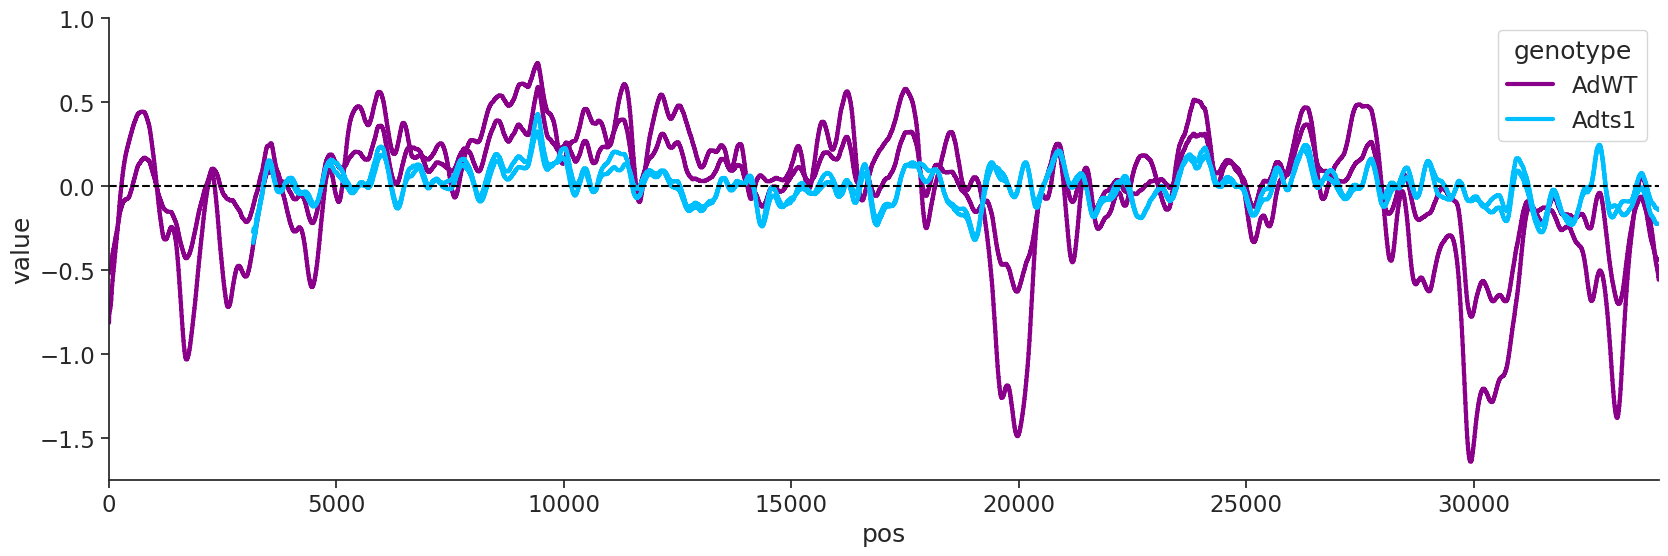

In [15]:
fig, ax = plt.subplots(figsize=(20,6))

sns.lineplot(
    x="pos",
    y="value",
    hue="genotype",
    data=logfc,
    linewidth=3,
    units="variable",
    estimator=None,
    palette={
    "AdWT":"darkmagenta",
    "Adts1":"deepskyblue"
    }
)

plt.axhline(0, c="black", linestyle="--")
plt.xlim(0, 34062)
plt.ylim(-1.75, 1)
sns.despine()

plt.savefig("../plots/DMS/footprint/global_accessibility/logFC_400w_100s.SEPARATELINES.png", dpi=300, bbox_inches="tight")
plt.savefig("../plots/DMS/footprint/global_accessibility/logFC_400w_100s.SEPARATELINES.svg", dpi=300, bbox_inches="tight")

In [10]:
wt_df = wt_df.reset_index().melt("pos")

ts1_df = ts1_df.reset_index().drop(["freets1_1", "freets1_2"], axis=1)
ts1_df["pos"] = ts1_df["pos"] + (34062-30890)
ts1_df = ts1_df.melt("pos")

In [11]:
dms_df = wt_df.append(ts1_df)
genotype = []
for sample in dms_df["variable"]:
    if "AdWT" in sample:
        genotype.append("AdWT")
    elif "Adts1" in sample:
        genotype.append("Adts1")
    else:
        genotype.append("free")
dms_df["genotype"] = genotype
dms_df

,pos,variable,value,genotype
0,1,AdWT_1,1618.16,AdWT
1,2,AdWT_1,1618.16,AdWT
2,3,AdWT_1,1618.16,AdWT
3,4,AdWT_1,1618.16,AdWT
4,5,AdWT_1,1618.16,AdWT
...,...,...,...,...
61775,34058,Adts1_2,26996.40,Adts1
61776,34059,Adts1_2,26996.40,Adts1
61777,34060,Adts1_2,26996.40,Adts1
61778,34061,Adts1_2,26996.40,Adts1


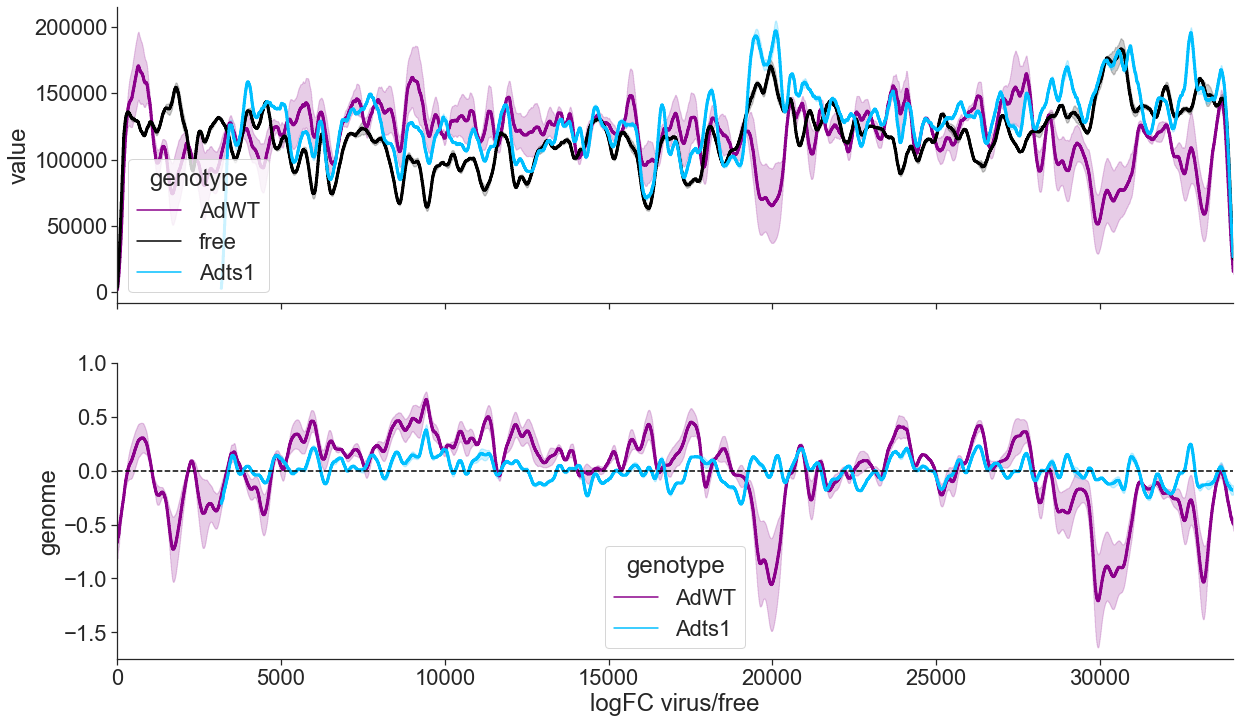

In [53]:
sns.set(font_scale=2)
sns.set_style("ticks")

fig, ax = plt.subplots(2,1,figsize=(20,12), sharex=True)

sns.lineplot(
    x="pos",
    y="value",
    hue="genotype",
    data=dms_df,
    linewidth=3,
    palette={
    "free":"black",
    "AdWT":"darkmagenta",
    "Adts1":"deepskyblue"
    },
    ax=ax[0]
)

ax[0].set_xlabel("DMS cuts")

sns.lineplot(
    x="pos",
    y="value",
    hue="genotype",
    data=logfc,
    linewidth=3,
    palette={
    "AdWT":"darkmagenta",
    "Adts1":"deepskyblue"
    },
    ax=ax[1]
)

ax[1].axhline(0, c="black", linestyle="--")
ax[1].set_xlim(0, 34062)
ax[1].set_ylim(-1.75, 1)
ax[1].set_ylabel("genome")
ax[1].set_xlabel("logFC virus/free")
sns.despine()

dms_df.to_csv("../data/aligned/DMS_footprint/final_data/dms_cuts_all_aligned.tab", sep="\t")
logfc.to_csv("../data/aligned/DMS_footprint/final_data/dms_cuts_LOGFC_all_aligned.tab", sep="\t")

plt.savefig("../plots/DMS/footprint/global_accessibility/CUTS_AND_LOGFC_400w_100s.png", dpi=300, bbox_inches="tight")
plt.savefig("../plots/DMS/footprint/global_accessibility/CUTS_AND_LOGFC_400w_100s.svg", dpi=300, bbox_inches="tight")

# Plot the logFC together with the DMS PSD

In [29]:
logfc = logfc.rename(columns={"pos":"mid", "variable":"sample", "value":"logFC virus/free"})

In [30]:
# load dms psd data lowess
dms_psd = pd.read_csv(
    "../data/aligned/DMS_footprint/final_data/DMSmet_PSD_lowess.tab",
    sep="\t",
    names=["mid", "sample", "Spectral Density", "genotype"],
    skiprows=1
)
dms_psd = dms_psd.loc[dms_psd["genotype"]!="free"]
dms_psd.head()

,mid,sample,Spectral Density,genotype
1908,350,AdWT_virus_DMS_2_footprint.wig_lowess,269489.171341,AdWT
1909,385,AdWT_virus_DMS_2_footprint.wig_lowess,305664.802771,AdWT
1910,420,AdWT_virus_DMS_2_footprint.wig_lowess,341458.557609,AdWT
1911,455,AdWT_virus_DMS_2_footprint.wig_lowess,376819.298368,AdWT
1912,490,AdWT_virus_DMS_2_footprint.wig_lowess,411719.299449,AdWT


In [31]:
# load dinuc autocorr psd lowess
dinucpsd = pd.read_csv(
    "../data/aligned/DMS_footprint/final_data/dinuc_autocorr_PSD_lowess.tab",
    names=["mid", "Spectral Density", "orig"],
    sep="\t",
    skiprows=1
)
dinucpsd["orig"] = "A/G + T/C autocorr PSD"

In [32]:
# load GC
gc = pd.read_csv("../sequences/Ad_E3del_seq/AdVir_del_GC_201.wig", sep=" ", skiprows=1, names=["pos", "score"])
# smoothen
lowess_gc = statsmodels.lowess(endog=gc["score"], exog=gc["pos"], frac=0.025)
lowess_gc = pd.DataFrame(lowess_gc, columns=["pos", "GC"])
lowess_gc["orig"] = "GC"

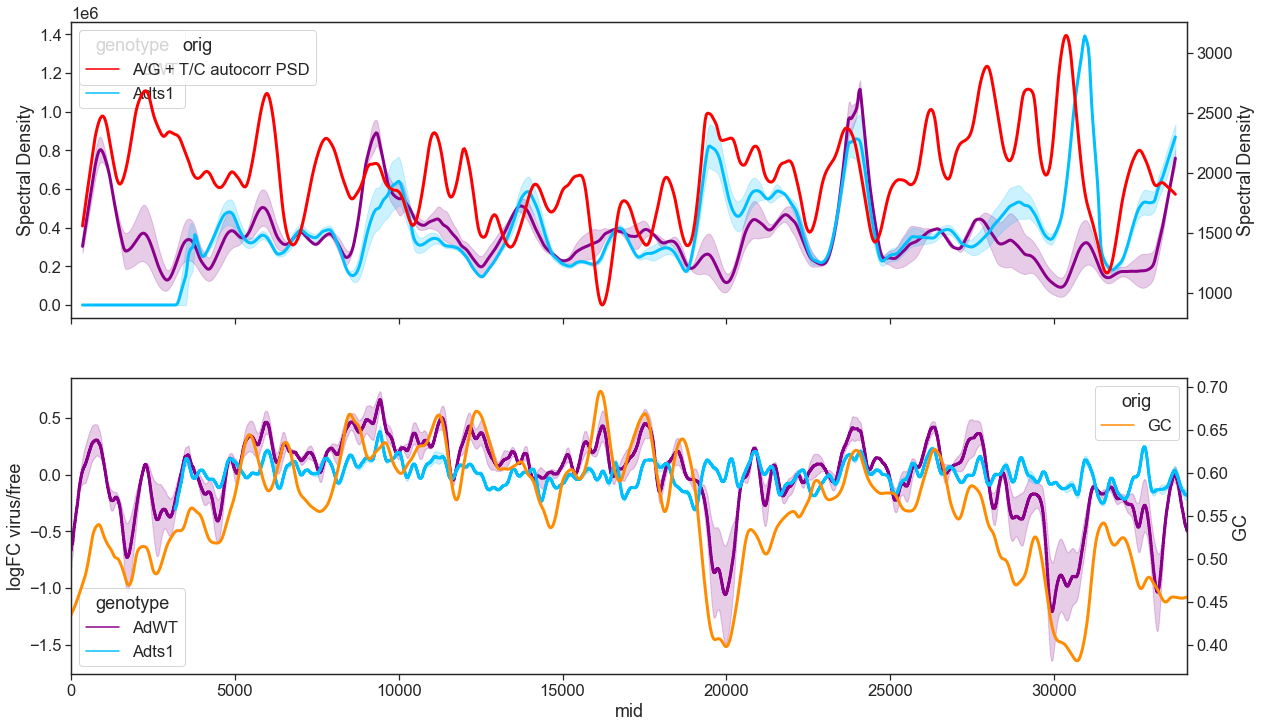

In [35]:
fig, ax = plt.subplots(2,1, figsize=(20,12), sharex=True)

sns.lineplot(
    x="mid",
    y="Spectral Density",
    hue="genotype",
    data=dms_psd,
    linewidth=3,
    ax=ax[0],
    palette={
        "AdWT":"darkmagenta",
        "Adts1":"deepskyblue"
    }
)

axdinuc = ax[0].twinx()
sns.lineplot(
    x="mid",
    y="Spectral Density",
    hue="orig",
    data=dinucpsd,
    linewidth=3,
    ax=axdinuc,
    palette={"A/G + T/C autocorr PSD":"red"}
)


sns.lineplot(
    x="mid",
    y="logFC virus/free",
    hue="genotype",
    data=logfc,
    linewidth=3,
    ax=ax[1],
    palette={
        "AdWT":"darkmagenta",
        "Adts1":"deepskyblue"
    }
)
axgc = ax[1].twinx()
sns.lineplot(
    x="pos",
    y="GC",
    hue="orig",
    data=lowess_gc,
    linewidth=3,
    ax=axgc,
    palette={"GC":"darkorange"}
)


plt.xlim(0,34062)

plt.savefig("../plots/paper_plots/logfc_DMSPSD_dinucPSD_GC_stacked.png", dpi=300, bbox_inches="tight")
plt.savefig("../plots/paper_plots/logfc_DMSPSD_dinucPSD_GC_stacked.svg", dpi=300, bbox_inches="tight")